# 0.0. IMPORTS
---

In [1]:
import pandas as pd
import sqlite3

from sqlite3 import Error

# 1.0. Load Files

In [2]:
customers = pd.read_csv( 'brazilian-ecommerce/olist_customers_dataset.csv' )
geolocations = pd.read_csv( 'brazilian-ecommerce/olist_geolocation_dataset.csv' )
order_items = pd.read_csv( 'brazilian-ecommerce/olist_order_items_dataset.csv' )
payments = pd.read_csv( 'brazilian-ecommerce/olist_order_payments_dataset.csv' )
reviews = pd.read_csv( 'brazilian-ecommerce/olist_order_reviews_dataset.csv' )
orders = pd.read_csv( 'brazilian-ecommerce/olist_orders_dataset.csv' )
products = pd.read_csv( 'brazilian-ecommerce/olist_products_dataset.csv' )
sellers = pd.read_csv( 'brazilian-ecommerce/olist_sellers_dataset.csv' )
product_name_translation = pd.read_csv( 'brazilian-ecommerce/product_category_name_translation.csv' )

## 1.1. Merge Files with Pandas

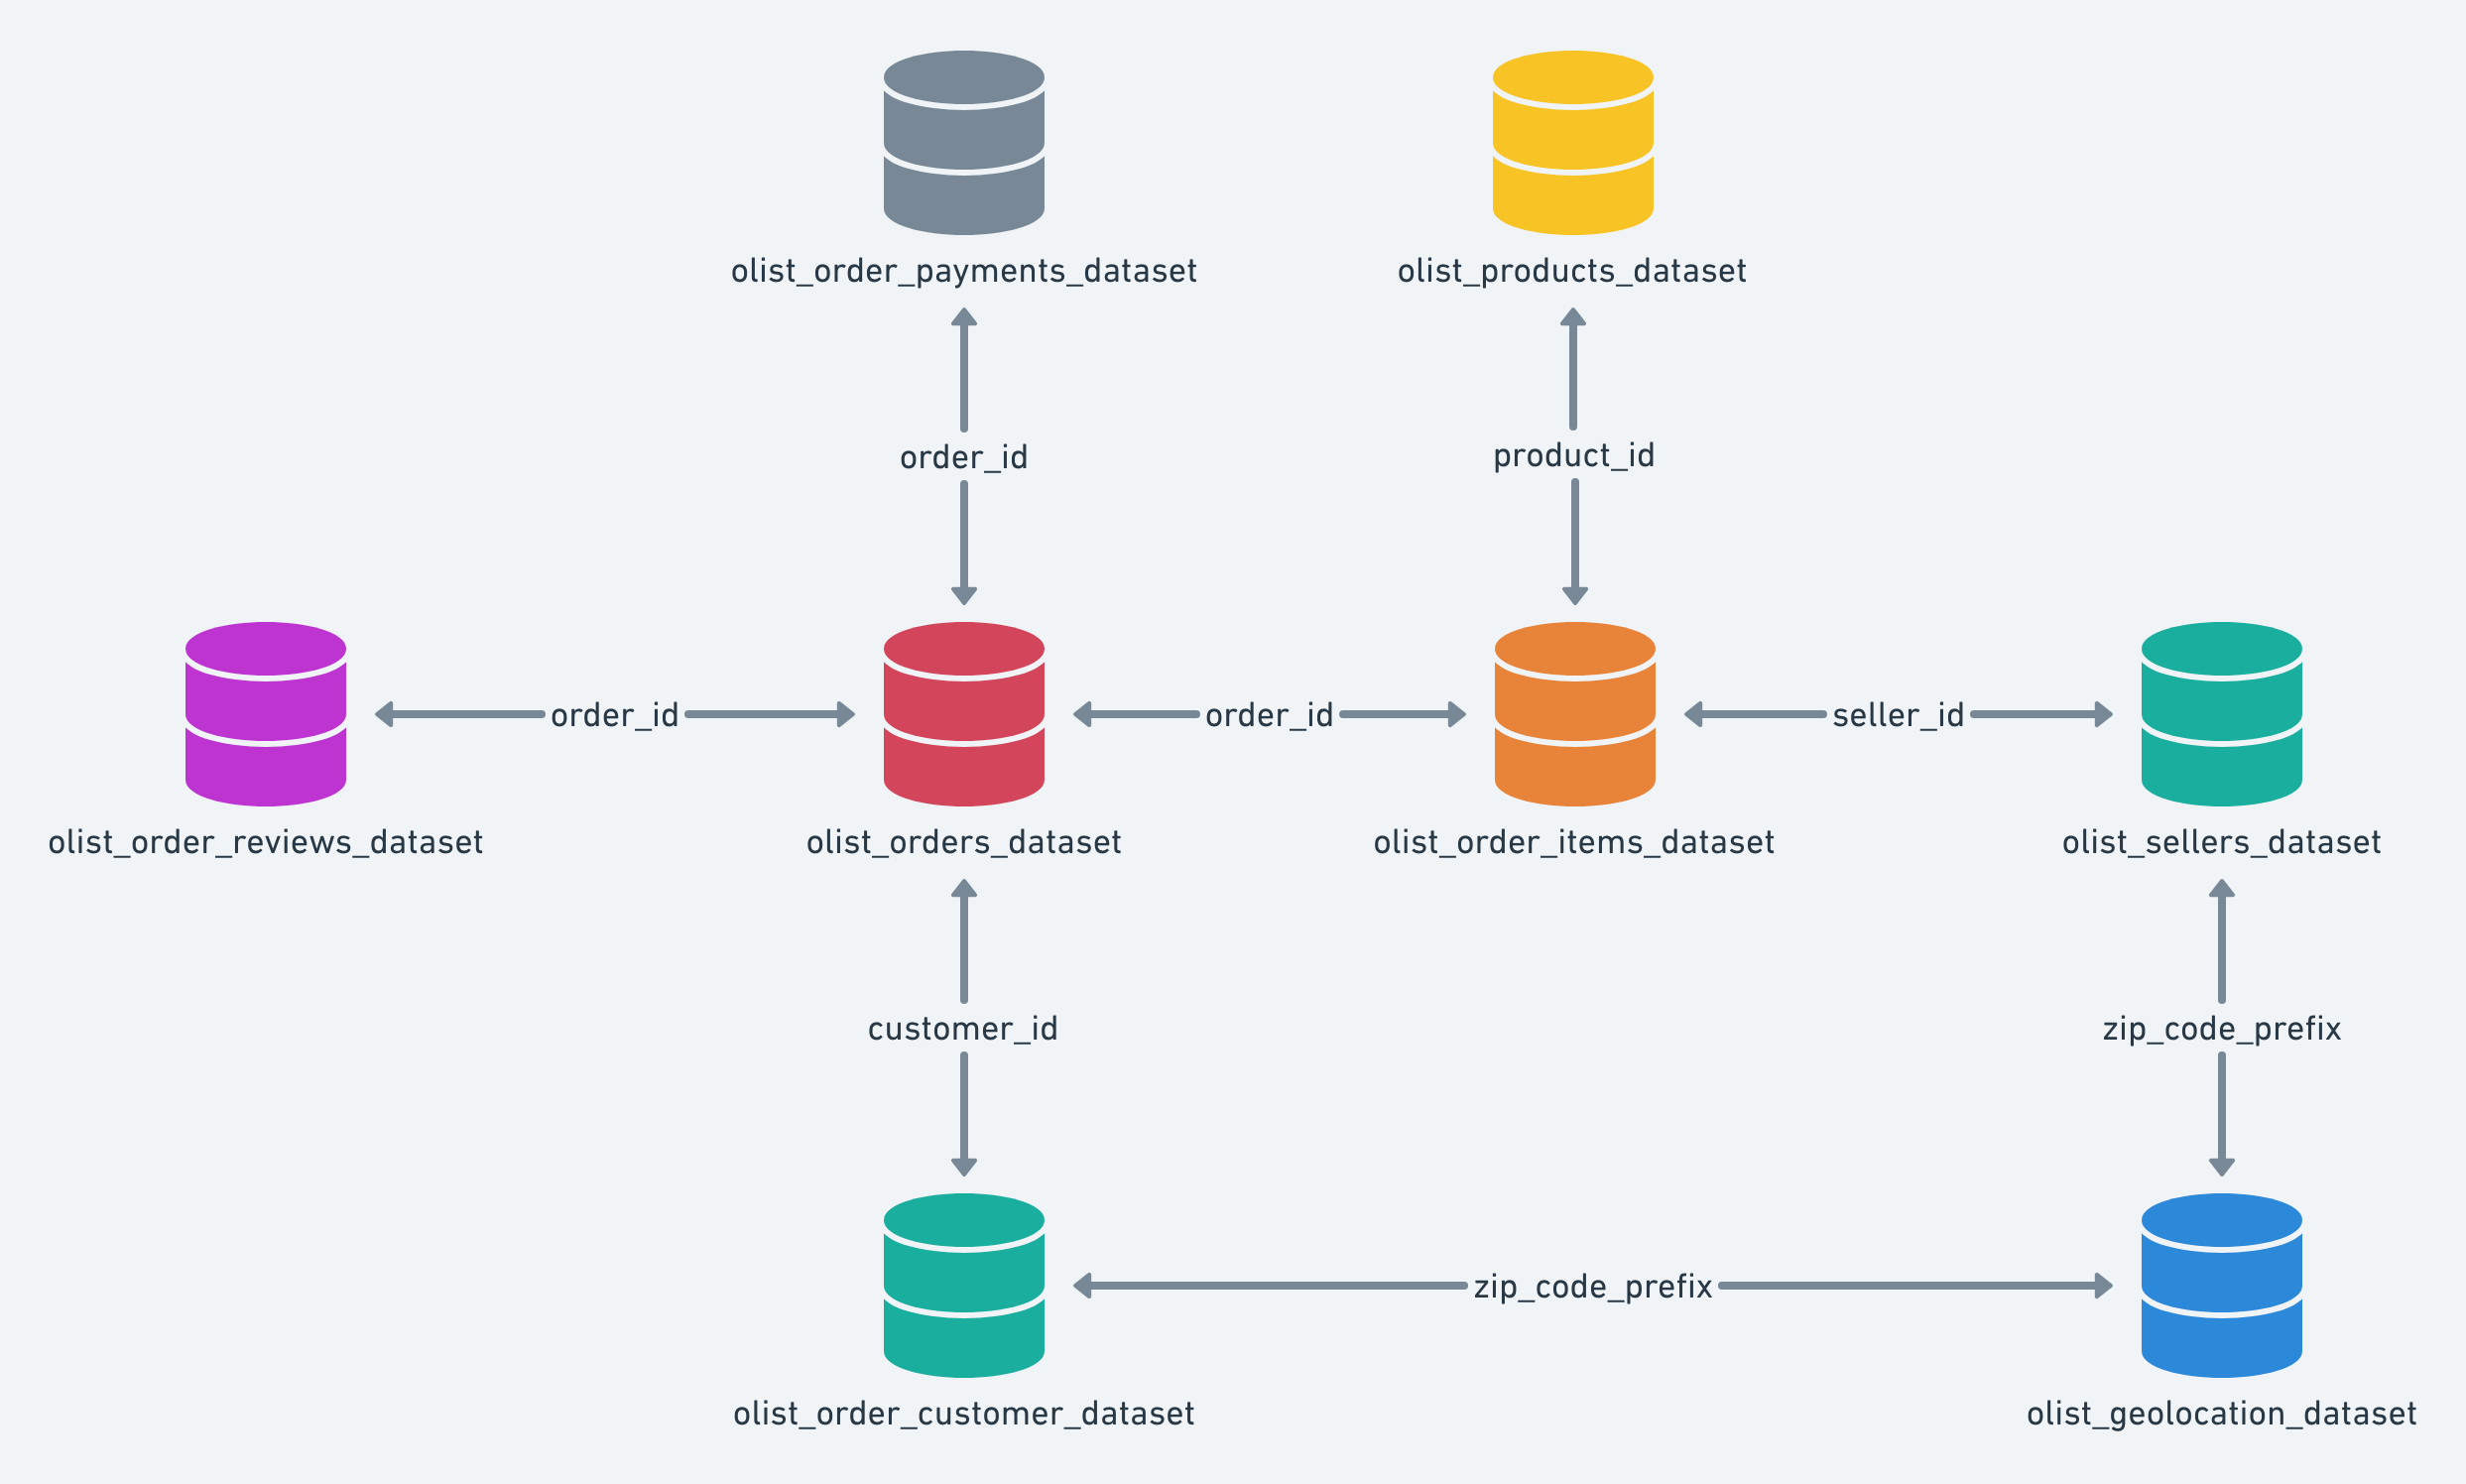

In [3]:
from IPython.display import Image
Image( 'olist_MER.png' )

In [ ]:
# Orders x Order Items
df1 = pd.merge( orders, order_items, how='inner', on='order_id' )

# ... x Reviews
df2 = pd.merge( df1, reviews, how='inner', on='order_id' )

# ... x Sellers
df3 = pd.merge( df2, sellers, how='inner', on='seller_id' )

# ... x Products
df4 = pd.merge( df3, products, how='inner', on='product_id' )

# ... x Payments
df5 = pd.merge( df4, payments, how='inner', on='order_id' )

# ... x Customers
df6 = pd.merge( df5, customers, how='inner', on='customer_id' )

# ... x Customers
df7 = pd.merge( df6, geolocations, how='inner', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix' )

In [7]:
df7.shape

(17093845, 44)

# 0.0. Sqlite3 Database

In [8]:
import sqlite3

In [10]:
## No terminal
#
## create dataset
#sqlite3 olistEcommerce.db
#
## import csv file into database as table
#.mode csv
#.import /Users/meigarom/repos/SejaUmDataScientist/brazilian-ecommerce/olist_orders_dataset.csv orders
#
## check the schema
#.schema
#
## check tables
#.tables

# 1.0. Query tables from Python

In [11]:
database = '/Users/meigarom/repos/SejaUmDataScientist/olistEcommerce.db'

In [12]:
conn = sqlite3.connect( database )

In [13]:
df = pd.read_sql_query( 'select * from orders', conn )

In [14]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
sql = """
SELECT *
FROM orders o LEFT JOIN order_items oi ON ( oi.order_id = o.order_id )
              LEFT JOIN reviews r      ON ( r.order_id = o.order_id )
              LEFT JOIN payments p     ON ( p.order_id = o.order_id )
              LEFT JOIN customers c    ON ( c.customer_id = o.customer_id )
              LEFT JOIN products pr    ON ( pr.product_id = oi.product_id )
              LEFT JOIN sellers s      ON ( s.seller_id = oi.seller_id )
"""

In [ ]:
df1 = pd.read_sql_query( sql, conn )

In [17]:
df1.head().T

,0,1,2,3,4
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d
customer_id,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 10:56:33,2018-07-24 20:41:37,2018-08-08 08:38:49
order_approved_at,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,2018-07-26 03:24:27,2018-08-08 08:55:23
order_delivered_carrier_date,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,2018-07-26 14:31:00,2018-08-08 13:50:00
order_delivered_customer_date,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,2018-08-07 15:27:45,2018-08-17 18:06:29
order_estimated_delivery_date,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,2018-08-13 00:00:00,2018-09-04 00:00:00
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d
order_item_id,1,1,1,1,1


# 2.0. Query tables 

In [41]:
cur = conn.cursor()

In [42]:
query = 'select * from orders limit 10;'

In [43]:
results = cur.execute( query ).fetchall()

# 3.0. Query tables from Dbeaver

In [ ]:
# install Dbeaver

# 0.0. IMPORTS
---

In [1]:
import pymc3  as pm
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display  import HTML

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
plt.style.use( 'fivethirtyeight')
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [4]:
HOME_PATH = '/Users/meigarom/repos/SejaUmDataScientist/brazilian-ecommerce/'
df_orders = pd.read_csv( HOME_PATH + 'olist_orders_dataset.csv' )
df_order_items = pd.read_csv( HOME_PATH + 'olist_order_items_dataset.csv' )
df_products = pd.read_csv( HOME_PATH + 'olist_products_dataset.csv' )
df_payments = pd.read_csv( HOME_PATH + 'olist_order_payments_dataset.csv' )
df_customers = pd.read_csv( HOME_PATH + 'olist_customers_dataset.csv' )
df_sellers = pd.read_csv( HOME_PATH + 'olist_sellers_dataset.csv' )

In [5]:
# Orders x Order Items
aux1 = pd.merge( df_orders, df_order_items, how='left', on='order_id' ) 

# Orders x Order Items x Products
aux2 = pd.merge( aux1, df_products, how='left', on='product_id' ) 

# Orders x Order Items x Products x Payments
aux3 = pd.merge( aux2, df_payments, how='left', on='order_id' ) 

# Orders x Order Items x Products x Payments x Customers
aux4 = pd.merge( aux3, df_customers, how='left', on='customer_id' ) 

# Orders x Order Items x Products x Payments x Customers x Sellers
df_raw = pd.merge( aux4, df_sellers, how='left', on='seller_id' ) 

# 1.0. DESCRIÇÃO DOS DADOS

In [6]:
df1 = df_raw.copy()

## 1.1. Data Dimension

In [7]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 118434
Number of Cols: 33


## 1.2. Data Types

In [8]:
df1['order_purchase_timestamp'] = pd.to_datetime( df1['order_purchase_timestamp'] )

df1['order_approved_at'] = pd.to_datetime( df1['order_approved_at'] )

df1['order_delivered_carrier_date'] = pd.to_datetime( df1['order_delivered_carrier_date'] )

df1['order_delivered_customer_date'] = pd.to_datetime( df1['order_delivered_customer_date'] )

df1['order_estimated_delivery_date'] = pd.to_datetime( df1['order_estimated_delivery_date'] )

In [9]:
df1.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       

## 1.3. Check NAs

In [10]:
df1.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 176
order_delivered_carrier_date     2074
order_delivered_customer_date    3397
order_estimated_delivery_date       0
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
product_category_name            2528
product_name_lenght              2528
product_description_lenght       2528
product_photos_qty               2528
product_weight_g                  850
product_length_cm                 850
product_height_cm                 850
product_width_cm                  850
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
customer_uni

# 2.0. FEATURE ENGINEERING

In [11]:
df2 = df1.copy()

## 2.1. Criação das Features

In [12]:
# year
df2['order_purchase_year'] = df2['order_purchase_timestamp'].dt.year

# month
df2['order_purchase_month'] = df2['order_purchase_timestamp'].dt.month

# day
df2['order_purchase_day'] = df2['order_purchase_timestamp'].dt.day

# week of year
df2['order_purchase_week_of_year'] = df2['order_purchase_timestamp'].dt.weekofyear

# order purchase year week
df2['order_purchase_year_week'] = df2['order_purchase_timestamp'].dt.strftime( '%Y-%W' )

# order estimated delivery year week
df2['order_estimated_delivery_year_week'] = df2['order_estimated_delivery_date'].dt.strftime( '%Y-%W' )

# 3.0. Filtragem das Variáveis

In [13]:
df3 = df2.copy()

In [14]:
df3 = df3[df3['order_status'] == 'canceled'][['order_id', 'order_status', 'order_purchase_timestamp', 'order_purchase_year_week']].reset_index(drop=True)

In [15]:
df3.head()

,order_id,order_status,order_purchase_timestamp,order_purchase_year_week
0,1b9ecfe83cdc259250e1a8aca174f0ad,canceled,2018-08-04 14:29:27,2018-31
1,714fb133a6730ab81fa1d3c1b2007291,canceled,2018-01-26 21:34:08,2018-04
2,3a129877493c8189c59c60eb71d97c29,canceled,2018-01-25 13:34:24,2018-04
3,3a129877493c8189c59c60eb71d97c29,canceled,2018-01-25 13:34:24,2018-04
4,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28 15:26:39,2018-35


# 4.0. Data Preparation

In [16]:
df4 = df3.copy()

In [17]:
df4 = df4[['order_purchase_year_week', 'order_id',]].groupby( 'order_purchase_year_week' ).count().reset_index()
df4 = df4.sort_values( 'order_purchase_year_week' )

In [18]:
df4.head()

,order_purchase_year_week,order_id
0,2016-36,1
1,2016-37,1
2,2016-39,1
3,2016-40,22
4,2016-41,2


# 5.0. Bayesian Inference Modelling - Behaviour Change

In [19]:
count_data = np.array( df4['order_id'] )
n_count_data = len( count_data )

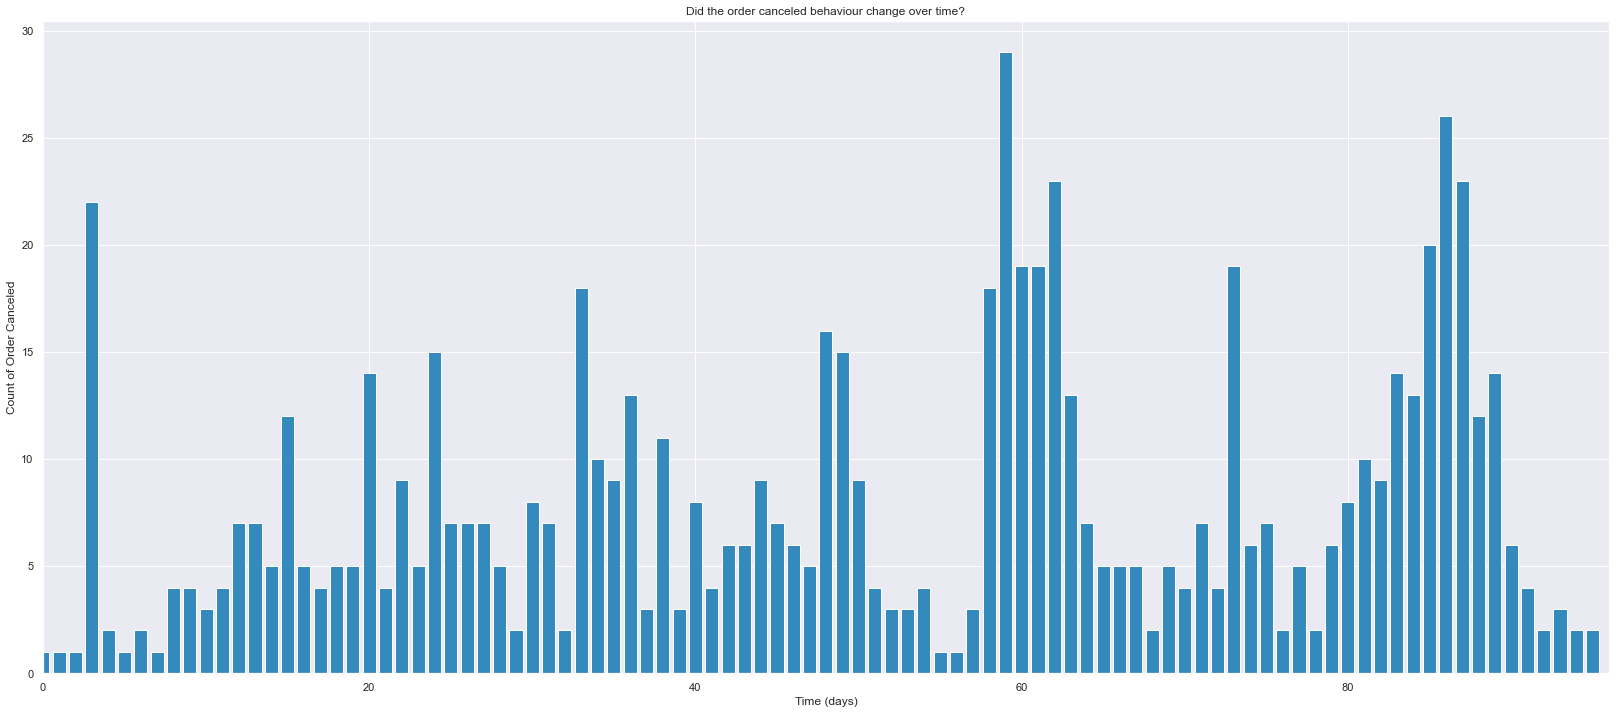

In [20]:
plt.bar( np.arange( n_count_data ), count_data, color='#348ABD' )
plt.xlabel( 'Time (days)' )
plt.ylabel( 'Count of Order Canceled' )
plt.title( 'Did the order canceled behaviour change over time?' )
plt.xlim( 0, n_count_data );

In [21]:
# Modelling
with pm.Model() as model:
    alpha = 1.0/count_data.mean()
    
    lambda_01 = pm.Exponential( 'lambda_01', alpha )
    lambda_02 = pm.Exponential( 'lambda_02', alpha )
    
    tau = pm.DiscreteUniform( 'tau', lower=0, upper=n_count_data-1 )

In [22]:
with model:
    idx = np.arange( n_count_data )
    lambda_ = pm.math.switch( tau > idx, lambda_01, lambda_02 )

    observation = pm.Poisson( 'obs', lambda_, observed=count_data )

    step = pm.Metropolis()
    trace = pm.sample( 10000, tune=5000, step=step )

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_02]
>Metropolis: [lambda_01]
Sampling 2 chains, 0 divergences: 100%|██████████| 30000/30000 [00:13<00:00, 2256.85draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [23]:
lambda_01_samples = trace['lambda_01']
lambda_02_samples = trace['lambda_02']
tau_samples = trace['tau']

(48.0, 66.0)

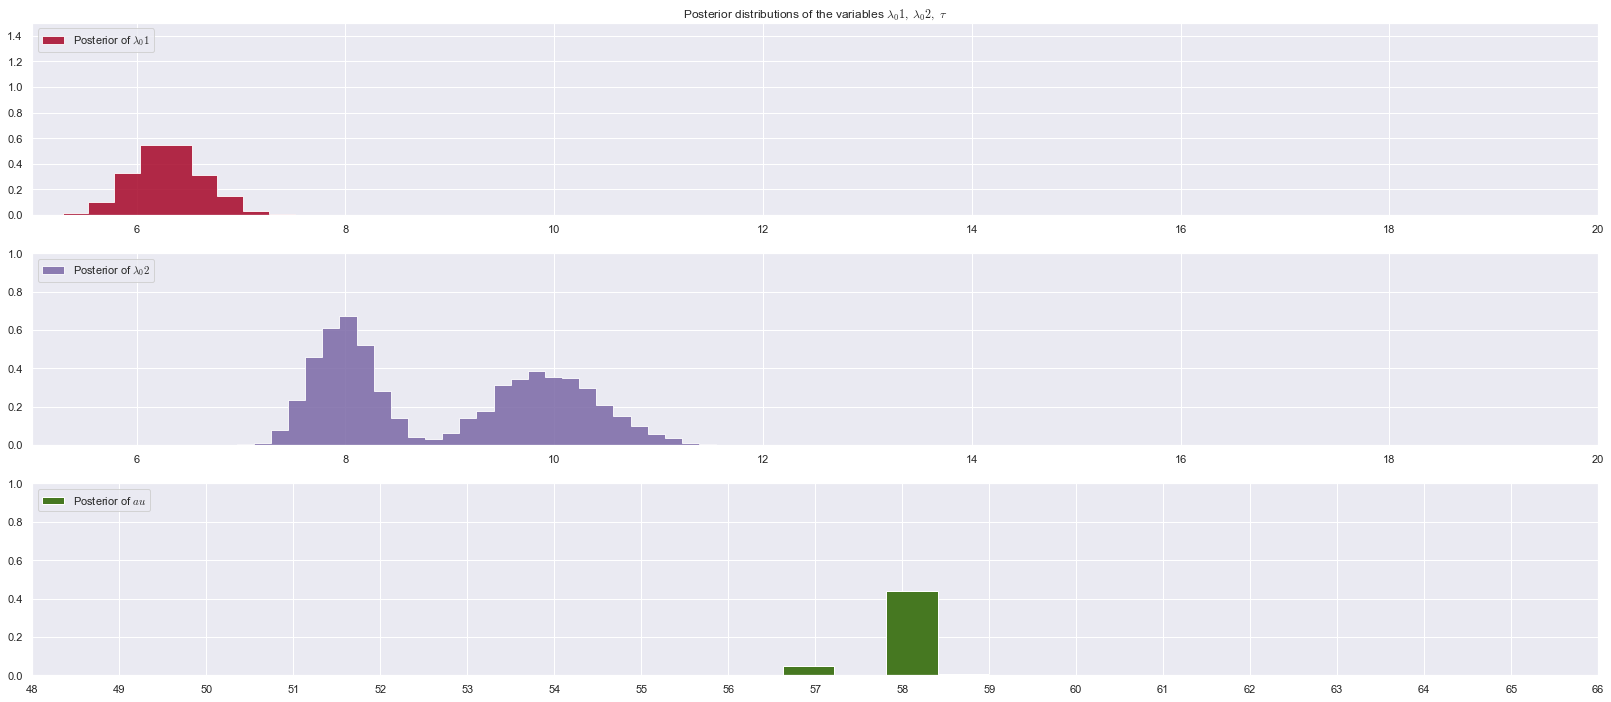

In [24]:
# Histogram of samples:
ax = plt.subplot( 311 )
ax.set_autoscaley_on( False )

plt.hist( lambda_01_samples, histtype='stepfilled', bins=30, alpha=0.85,
            label='Posterior of $\lambda_01$', color='#A60628', density=True )
plt.legend( loc='upper left')
plt.title( r"""Posterior distributions of the variables $\lambda_01,\;\lambda_02,\;\tau$""" )
plt.ylim( [0, 1.5])
plt.xlim( [5, 20] )

ax = plt.subplot( 312 )
ax.set_autoscaley_on( False )

plt.hist( lambda_02_samples, histtype='stepfilled', bins=30, alpha=0.85,
        label='Posterior of $\lambda_02$', color='#7A68A6', density=True )
plt.legend( loc='upper left' )
plt.xlim( [5, 20] )

plt.subplot( 313 )
w = 1.0 / tau_samples.shape[0] * np.ones_like( tau_samples )

plt.hist( tau_samples, bins=n_count_data, alpha=1, 
        label='Posterior of $\tau$', color='#467821', weights=w, rwidth=2. )

plt.xticks( np.arange( n_count_data ) )
plt.legend( loc='upper left' )
plt.ylim( [0, 1] )
plt.xlim( [48, len( count_data )-30] )

In [25]:
# Interpretation
# 1. The wider the distribution, the less certain our posterior belief should be
# 2. lambda_01 ~ 6.5
# 3. lambda_02 ~ 10
# 4. The posterior distributions of the two lambda's are clearly distinct, indicating that it's indeed likely that there was a change in the Order Canceled behaviour.
# 5. Near day 58, there was 90% chance that user's behaviour changed.

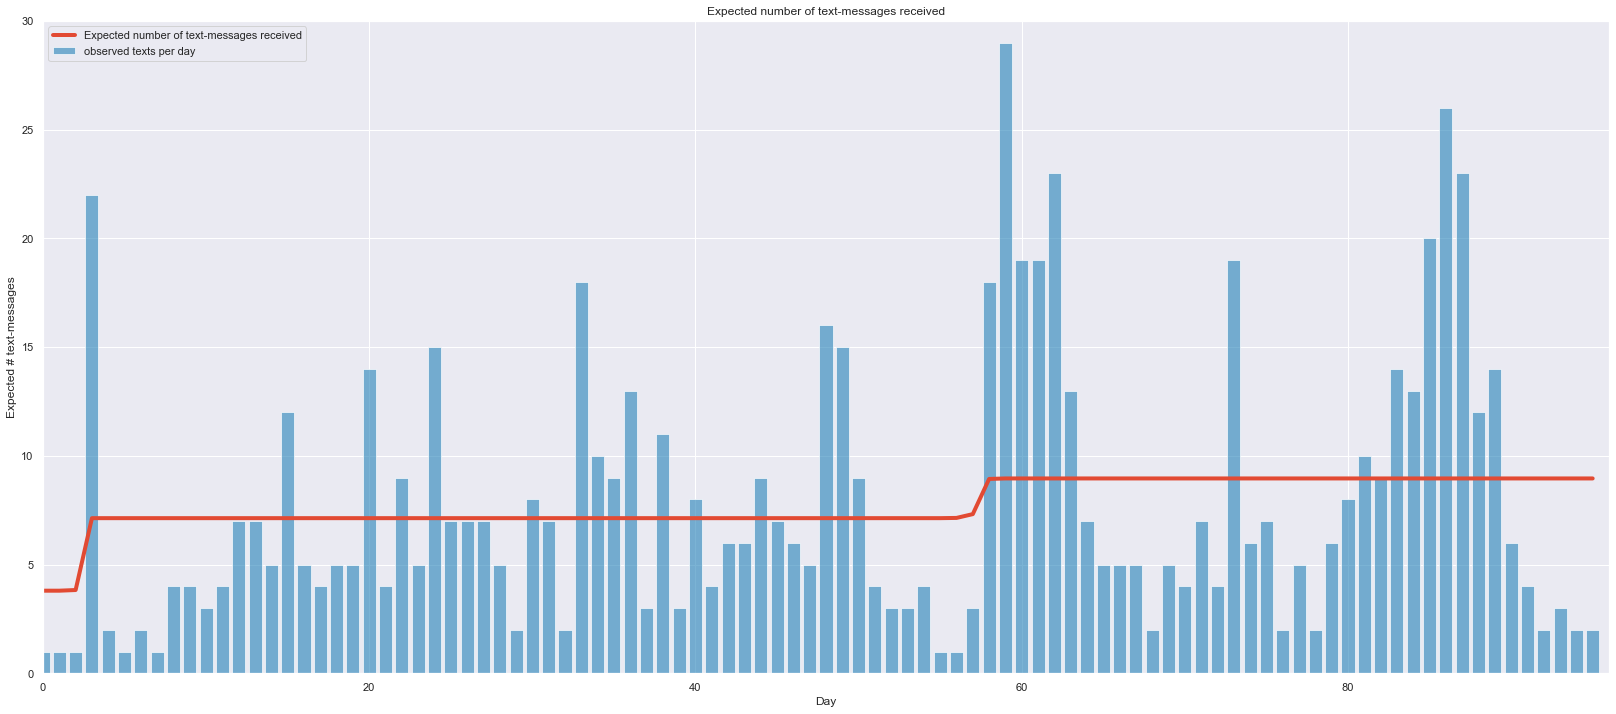

In [26]:
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros( n_count_data )

for day in range( 0, n_count_data ):
    ix = day < tau_samples
    expected_texts_per_day[ day ] = ( lambda_01_samples[ix].sum() + lambda_02_samples[~ix].sum() ) / N
    
plt.plot( range( n_count_data ), expected_texts_per_day, lw=4, color='#E24A33', 
          label='Expected number of text-messages received' )

plt.xlim( 0, n_count_data )
plt.xlabel( 'Day' )
plt.ylabel( 'Expected # text-messages' )
plt.title( 'Expected number of text-messages received' )
plt.ylim( 0, 30 )
plt.bar( np.arange( len( count_data ) ), count_data, color='#348ABD', 
         alpha=0.65, label='observed texts per day' )

plt.legend( loc='upper left')

# 6.0. Bayesian Inference Modelling
---

## 6.1. What is the probability of the  next Shipped Order being Delivery?

# 7.0. Bayesian Inference Modelling: [Off-Topic] - Probability to see an bear in the next tour?
---

In [92]:
# observations
animals = ['lions', 'tigers', 'bears']
c = np.array( [3, 2, 1])

# hyperparameters( initially all equal )
alphas = np.array( [1, 1, 1] )

alpha_list = [np.array( [0.1, 0.1, 0.1] ), np.array( [1, 1, 1] ),
              np.array( [5, 5, 5] ), np.array( [15, 15, 15] ) ]

In [ ]:
# Bayesian Model

with pm.Model() as model:
    parameters = pm.Dirichlet( 'parameters', a=alphas, shape=3 )
    
    observed_data = pm.Multinomial( 'observed_data', n=6, p=parameters, shape=3, observed=c )

model

In [27]:
# Maximum a Posterior Estimation

with model:
    map_ = pm.find_MAP()

dict( zip( animals, map_['parameters'] ) )

In [28]:
# Posterior Estimation with Uncertanty

# sampling from the posterior
with model:
    trace = pm.sample( draws=1000, chains=2, tune=500, discard_tuned_samples=True )

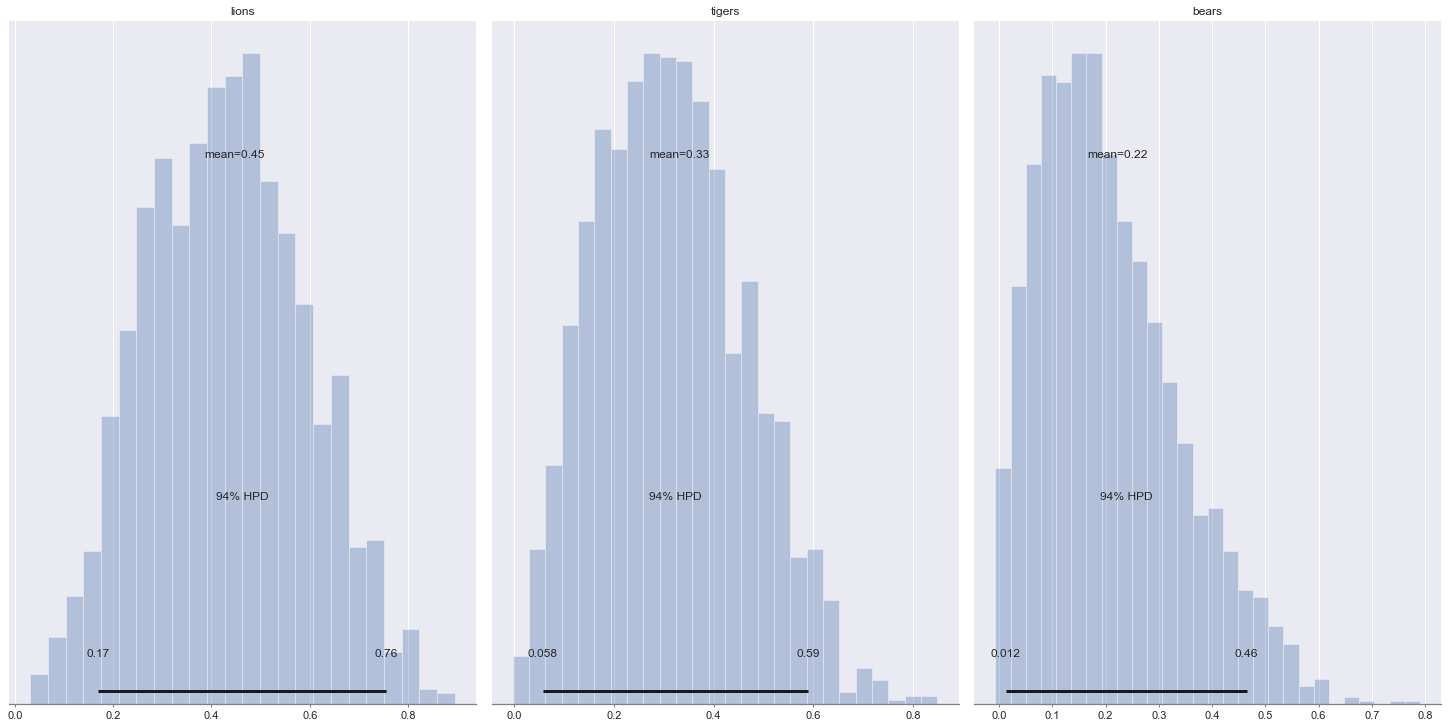

In [104]:
# plot posterior
ax = pm.plot_posterior( trace, var_names=['parameters'], figsize=(20,10), kind='hist' );

for i, a in enumerate( animals ):
    ax[i].set_title( a );

In [115]:
df_samples = pd.DataFrame( trace['parameters'], columns=animals )

pvals = df_samples.iloc[:, :3].mean( axis=0 )

In [122]:
# next observation
next_obs = np.random.multinomial( n=1, pvals=pvals, size=10000)

aux1 = pd.DataFrame( next_obs, columns=['lions', 'tigers', 'bears'] )

aux2 = pd.melt( aux1 ).groupby( 'variable' )['value'].value_counts( normalize=True ).to_frame().rename( columns={'value': 'total'} ).reset_index()

next_obs = aux2.loc[aux2['value'] == 1]

next_obs[['variable', 'total']]

Text(0, 0.5, 'Likelihood')

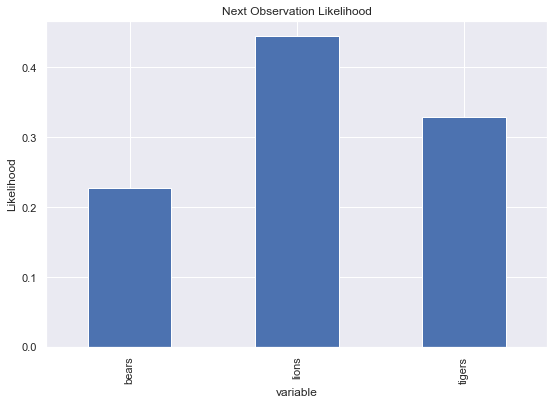

In [146]:
next_obs.set_index( 'variable' )['total'].plot.bar( figsize=(8, 6) );
plt.title( 'Next Observation Likelihood' );
plt.ylabel( 'Likelihood')

In [29]:
# More observations

In [201]:
c = np.array( [3, 2, 1] )

alphas = np.array( [2, 1, 0.5] )

with pm.Model() as model:
    parameters = pm.Dirichlet( 'parameters', a=alphas, shape=3 )
    
    observed_data = pm.Multinomial( 'observed_data', n=6, p=parameters, shape=3, observed=c )
    
    trace = pm.sample( draws=1000, chains=2, tune=500, discard_tuned_samples=True, step=pm.Metropolis() )

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [parameters]
Sampling 2 chains, 0 divergences: 100%|██████████| 3000/3000 [00:02<00:00, 1131.05draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


In [202]:
summary = pm.summary( trace )
summary.index = animals
summary

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
lions,0.505,0.149,0.224,0.755,0.008,0.005,385.0,385.0,384.0,506.0,1.02
tigers,0.329,0.146,0.077,0.606,0.018,0.013,67.0,67.0,74.0,124.0,1.04
bears,0.166,0.116,0.006,0.372,0.009,0.006,169.0,169.0,144.0,148.0,1.02


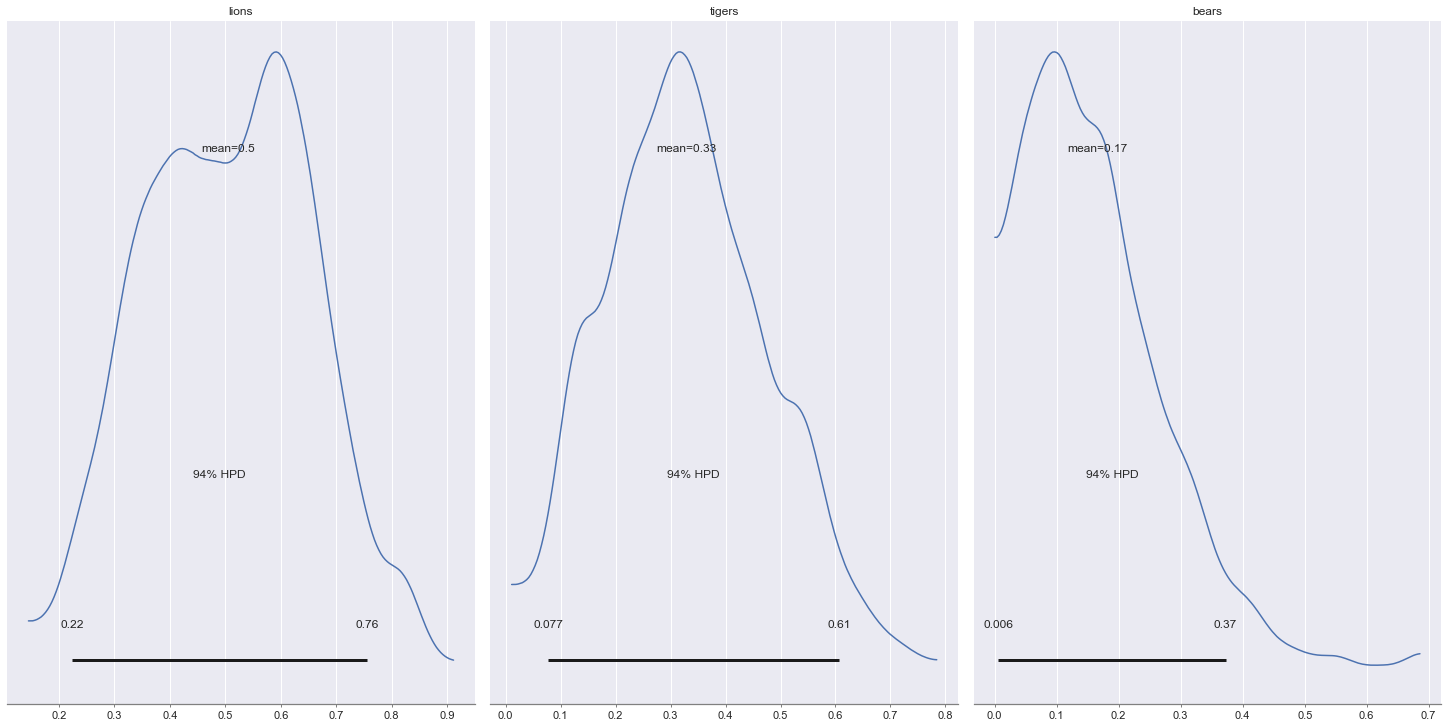

In [203]:
# plot posterior
ax = pm.plot_posterior( trace, var_names=['parameters'], figsize=(20,10) );

for i, a in enumerate( animals ):
    ax[i].set_title( a );

# 8.0. What is the probability that the next week we see a order deliveried? -- Move to 6.2.
---

In [31]:
## Data Processing

# copy original dataframe
df0 = df2.copy()

# get only columns of interested
df01 = df0[df0['order_status'].isin( ['shipped', 'delivered' ] )][['order_id', 'order_status', 'order_estimated_delivery_year_week']]

In [81]:
df02 = df01.groupby( ['order_estimated_delivery_year_week', 'order_status'] ).count().reset_index()

In [82]:
# Fill data with 0 delivered or shipped
# dates
dates_2016 = [ '2016-' + str( s ) for s in np.arange( 40, 54, 1 ) ]
dates_2017 = [ '2017-' + str( s ) for s in np.arange( 1, 53, 1 ) ]
dates_2018 = [ '2018-' + str( s ) for s in np.arange( 1, 44, 1 ) ]

# concatenate the list of dates
dates = dates_2016 + dates_2017 + dates_2018 

# order status
shipped = ['shipped'] * len( dates )
delivered = ['delivered'] * len( dates )

# Join date and order status
a = pd.DataFrame.from_dict( {'order_estimated_delivery_year_week': dates, 'order_status': shipped } )
b = pd.DataFrame.from_dict( {'order_estimated_delivery_year_week': dates, 'order_status': delivered } )
c = pd.concat( [a, b] ).sort_values( 'order_estimated_delivery_year_week' )

In [83]:
# Merge Reference dataframe to data
df03 = pd.merge( c, df02, how='left', on=['order_estimated_delivery_year_week', 'order_status'] ).fillna( 0 ).sort_values( 'order_estimated_delivery_year_week' )

In [30]:
## Bayesian Modelling

data = []
for i in range( 0, df02.shape[0] ):
    
    s = df02['order_id'][i].astype( int )
    if df02['order_status'][i] == 'shipped':
        zeros = list( np.zeros( s ) )
        data = data + zeros
        
    else:
        ones = list( np.ones( s ) )
        data = data + ones

In [199]:
len( data )

116283

In [200]:
import scipy.stats as stats
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500, 750, 1000]

# heads = 1
# tails = 1
data = np.asarray( data[:n_trials[-1]] )
#data = stats.bernoulli.rvs( 0.5, size=n_trials[-1] )

x = np.linspace( 0, 1, 100 )

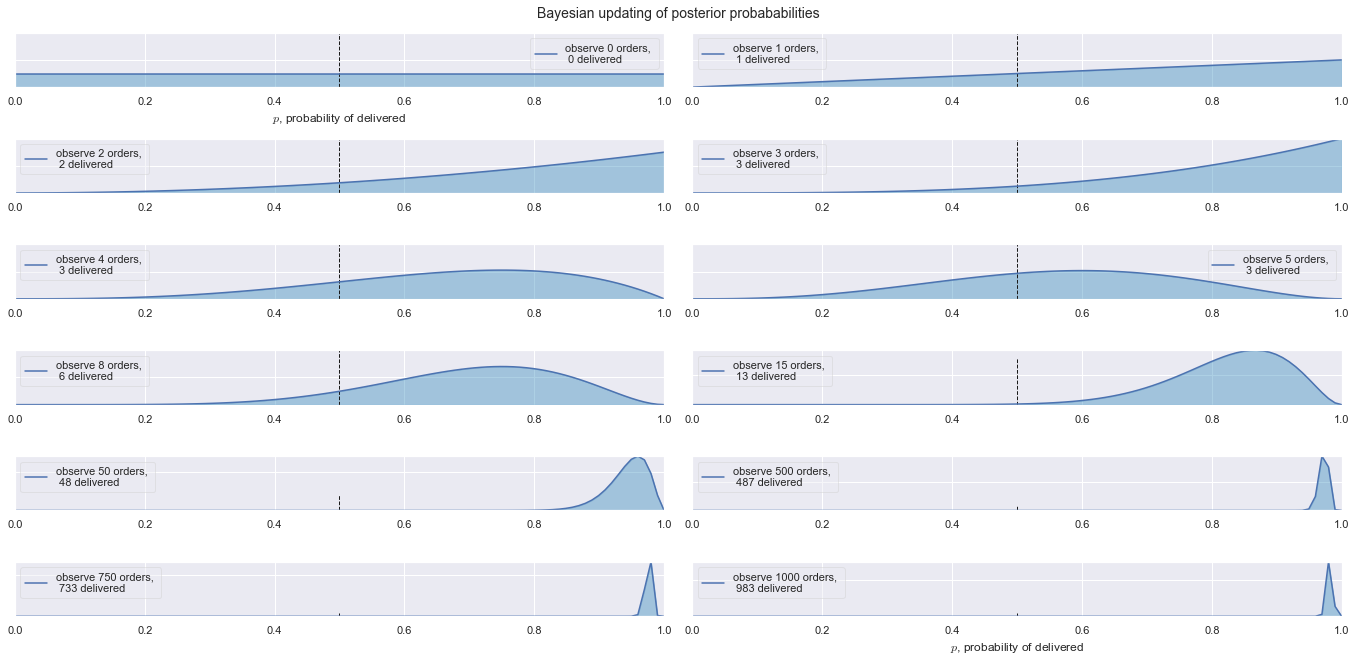

In [201]:
from IPython.core.pylabtools import figsize

figsize( 19, 9 )
for k, N in enumerate( n_trials ):
    sx = plt.subplot( len( n_trials )/2, 2, k+1 )
    plt.xlabel( "$p$, probability of delivered" ) if k in [0, len( n_trials )-1] else None
    plt.setp( sx.get_yticklabels(), visible=False )
    
    heads = data[:N].sum()
    y = stats.beta.pdf( x, 1+heads, 1+N-heads )
    plt.plot( x, y, label='observe %d orders, \n %d delivered' % ( N, heads ) )
    plt.fill_between( x, 0, y, color='#348ABD', alpha=0.4 )
    plt.vlines( 0.5, 0, 4, color='k', linestyle='--', lw=1 )
    
    leg = plt.legend()
    leg.get_frame().set_alpha( 0.4 )
    plt.autoscale( tight=True )
    
plt.suptitle( 'Bayesian updating of posterior probababilities', y=1.02, fontsize=14 )
    
plt.tight_layout()

# 9.0. Bayesian Inference: [Off-Topic] - Evaluate Marketing Campaign
---

In [323]:
import numpy as np
from scipy.misc import factorial
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,7)


def likelihood(theta, n, x):
    """
    likelihood function for a binomial distribution

    n: [int] the number of experiments
    x: [int] the number of successes
    theta: [float] the proposed probability of success
    """
    return (factorial(n) / (factorial(x) * factorial(n - x))) * (theta ** x) * ((1 - theta) ** (n - x))

#the number of impressions for our facebook-yellow-dress campaign
n_impressions = 10.                                             
                                                               
#the number of clicks for our facebook-yellow-dress campaign
n_clicks = 7.                                                  

#observed click through rate
ctr = n_clicks / n_impressions                                 

##0 to 1, all possible click through rates
#possible_theta_values = map(lambda x: x/100., range(100))
#                                                               
##evaluate the likelihood function for possible click through rates
#likelihoods = map(lambda theta: likelihood(theta, n, x)\
#                                , possible_theta_values)
#
##pick the best theta
#mle = possible_theta_values[np.argmax(likelihoods)]
#
##plot
#f, ax = plt.subplots(1)          
#ax.plot(possible_theta_values, likelihoods)
#ax.axvline(mle, linestyle = "--")
#ax.set_xlabel("Theta")
#ax.set_ylabel("Likelihood")
#ax.grid()
#ax.set_title("Likelihood of Theta for New Campaign")
#plt.show()

ImportError: cannot import name 'factorial' from 'scipy.misc' (/Users/meigarom/.pyenv/versions/3.8.0/envs/sejaumdatascientist/lib/python3.8/site-packages/scipy/misc/__init__.py)

# 10.0. Bayesian Inference: [Off-Topic] - Choose Between Books based on % of Positive
---

In [32]:
# Probabilidade de você gostar mais do livro B? R: 29%
# Probabilidade de você gostar mais do livro A: R: 70%
# gerando os dados!

X_a = np.array( [0] * 2 + [1] * 48 ) # Book A: 50 reviews onde 96 foram positivos.
np.random.shuffle(X_a)

X_b = np.array( [0] * 14 + [1] * 186 ) # Book B: 200 reviews onde 93% foram positivos. 
np.random.shuffle(X_b)

print('Livro A:', X_a)
print('Livro B:', X_b)

Livro A: [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1]
Livro B: [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


# 11.0. Bayesian Inference: [Off-Topic] - Choose Cellphones based on % Stars
---

In [541]:
# Modelling
with pm.Model() as model:
    
    # Initializes the Dirichlet distribution with a Uniform Prior:
    theta_a = pm.Dirichlet( 'theta_a', a=np.ones( k_a ) )
    theta_b = pm.Dirichlet( 'theta_b', a=np.ones( k_b ) )
    
    # delta
    delta = pm.Deterministic( 'delta', theta_a - theta_b )
    
    
    # Likelihood 
    observation_A = pm.Multinomial( 'obs_A', n=n_a , p=theta_a, observed=X_a )
    observation_B = pm.Multinomial( 'obs_B', n=n_b , p=theta_b, observed=X_b )
    
    # Posterior - Draw samples from posterior
    trace = pm.sample( draws=2000, tune=1000, step=pm.Metropolis() )

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [theta_b]
>Metropolis: [theta_a]
Sampling 2 chains, 0 divergences: 100%|██████████| 6000/6000 [00:04<00:00, 1323.17draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [542]:
diff = trace['delta'][:,0]

len( diff[ diff > 0 ] ) / len( diff )

diff = trace['delta'][:,1]

len( diff[ diff > 0 ] ) / len( diff )

diff = trace['delta'][:,2]

len( diff[ diff > 0 ] ) / len( diff )

# plot posterior
ax = pm.plot_posterior( trace, var_names=['delta_0'], figsize=(20,10), kind='hist' );

print( 'Probabilidade de dar uma nota 5 para o Celphone A: {:.2f}%'.format( 100*np.mean( trace['delta_0'][:,0] > 0 ) ) )
print( 'Probabilidade de dar uma nota 4 para o Celphone A: {:.2f}%'.format( 100*np.mean( trace['delta_0'][:,1] > 0 ) ) )
print( 'Probabilidade de dar uma nota 3 para o Celphone A: {:.2f}%'.format( 100*np.mean( trace['delta_0'][:,2] > 0 ) ) )

0.44025

# 12.0. Bayesian Inference: [Off-Topic] - Choose Cellphones based on % Stars - Simplified
---

In [92]:
# Motorola One https://amzn.to/34GDkMk
# 4,6 de 5
X_a = np.array( [1] * ( int(0.77*300) + int(0.15*300) ) + [0] * ( int(0.02*300) + int(0.03*300) ) )
np.random.shuffle( X_a )

# Xiomi https://amzn.to/3cdYtzZ
# 4,7 de 5
X_b = np.array( [1] * ( int(0.83*201) + int(0.09*201 ) ) + [0] * ( int(0.01*201) + int(0.03*201) ) )
np.random.shuffle(X_b)

print( 'Motorola One - Positive Reviews: {} / Total Reviews: {}'.format( X_a.sum(), len( X_a ) ) )
print( 'Xiomi Mi 9T - Positive Reviews: {} / Total Reviews: {}'.format( X_b.sum(), len( X_b ) ) )

Motorola One - Positive Reviews: 276 / Total Reviews: 291
Xiomi Mi 9T - Positive Reviews: 184 / Total Reviews: 192


In [95]:
# Bayesian Modelling
with pm.Model() as model:
    # prior
    p_a = pm.Beta( 'p_a', 5, 2 )
    p_b = pm.Beta( 'p_b', 1, 1 )
    
    # delta
    delta = pm.Deterministic( 'delta', p_a - p_b )
    
    # likelihoood
    obs_A = pm.Bernoulli( 'obs_a', p_a, observed=X_a )
    obs_B = pm.Bernoulli( 'obs_b', p_b, observed=X_b )
    
    # posterior
    trace = pm.sample( draws=2000, tune=1000, step=pm.Metropolis() )

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_b]
>Metropolis: [p_a]
Sampling 2 chains, 0 divergences: 100%|██████████| 6000/6000 [00:02<00:00, 2047.35draws/s]
The number of effective samples is smaller than 25% for some parameters.


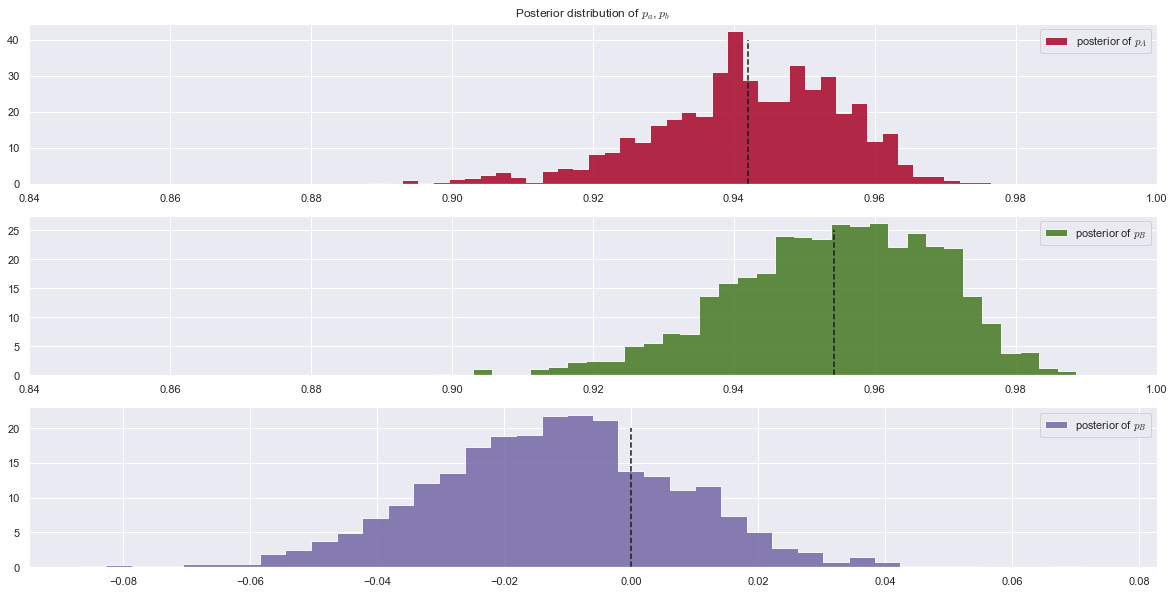

In [96]:
figsize(18, 10 )

# histogram of posteriors
ax = plt.subplot( 311 )
plt.hist( trace['p_a'], histtype='stepfilled', bins=40, alpha=0.85, label='posterior of $p_A$', color='#A60628', density=True );
plt.xlim( [0.84, 1.0] )
plt.vlines( trace['p_a'].mean(), 0, 40, linestyle='--' )
plt.legend( loc='upper right')
plt.title( 'Posterior distribution of $p_a$, $p_b$' )

ax = plt.subplot( 312 )
plt.hist( trace['p_b'], histtype='stepfilled', bins=40, alpha=0.85, label='posterior of $p_B$', color='#467821', density=True )
plt.xlim( [0.84, 1.0] )
plt.vlines( trace['p_b'].mean(), 0, 25, linestyle='--' )
plt.legend( loc='upper right')

ax = plt.subplot( 313 )
plt.hist( trace['delta'], histtype='stepfilled', bins=40, alpha=0.85, label='posterior of $p_B$', color='#7468A6', density=True )
plt.vlines( 0, 0, 20, linestyle='--' )
plt.legend( loc='upper right')


In [97]:
print( 'MAP A: {}'.format( trace['p_a'].mean() ) )
print( 'MAP B: {}'.format( trace['p_b'].mean() ) )

MAP A: 0.9420066117181891
MAP B: 0.9542421004930655


In [98]:
print( 'Probability de Gostar mais do Celular A: {:.2f}%'.format( 100*np.mean( trace['delta'] > 0 ) ) )
print( 'Probability de Gostar mais do Celular B: {:.2f}%'.format( 100*np.mean( trace['delta'] < 0 ) ) )

Probability de Gostar mais do Celular A: 25.67%
Probability de Gostar mais do Celular B: 74.33%
